<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Importer_Risk_Prediction_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Necessary Libraries**

In [148]:
# Installing required libraries
# !pip install --upgrade tensorflow
# !pip install fancyimpute scikit-learn pandas
# !pip install --upgrade scikit-learn imbalanced-learn

# **Importing Necessary Libraries**

In [149]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import random
import pickle
import joblib

# **Mounting the Google Drive**

In [150]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [151]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_excel('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/IMPORT STATISTICS - 2023.xlsx')

In [152]:
# Displaying the first few rows of the data
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Unknown,2023.0,JANUARY,280110,BANGLADESH,Kg.,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
1,Unknown,2023.0,JANUARY,280110,INDIA,Kg.,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
2,Unknown,2023.0,JANUARY,280110,MALAYSIA,Kg.,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
3,Unknown,2023.0,FEBRUARY,280110,BANGLADESH,Kg.,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
4,Unknown,2023.0,FEBRUARY,280110,INDIA,Kg.,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine


# **Exploratary Data Analysis**

In [153]:
# Displaying information
print("Displaying data information")
data.info()

Displaying data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           292 non-null    object 
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1038 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 89.7+ KB


## **Identifying Categorical and Numerical Features**

In [154]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [155]:
# Displaying the Categorical and the Numerical columns'
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01',
       'DESCRIPTION_02', 'DESCRIPTION_03'],
      dtype='object')

Numerical Columns:
Index(['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS'], dtype='object')


**Since 'HSCODE' column has been misintepreted as an int64 data type column due to the unavailability of data, reassigning it has an object type column.**

In [156]:
# Converting 'HSCODE' columns to string type
data['HSCODE'] = data['HSCODE'].astype(str)

# Displaying the HSCODE column data type
print("Data Type of HSCODE Columns:")
print(data[['HSCODE']].dtypes)

Data Type of HSCODE Columns:
HSCODE    object
dtype: object


### **Categorical Features**

In [157]:
# List of categorical features
categorical_features = ['IMPORTER', 'MONTH', 'COUNTRY', 'HSCODE', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03']

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- IMPORTER
- MONTH
- COUNTRY
- HSCODE
- UNIT
- DESCRIPTION_01
- DESCRIPTION_02
- DESCRIPTION_03

Data Type of Categorical Features:
IMPORTER          object
MONTH             object
COUNTRY           object
HSCODE            object
UNIT              object
DESCRIPTION_01    object
DESCRIPTION_02    object
DESCRIPTION_03    object
dtype: object


**Unique values and their counts relevant to each categorical column**

In [158]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
U.S.A.       1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
UNIT
Kg     750
Kg.    112
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic comp

**Categorical columns with null values and their relevant counts**

In [159]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:
MONTH: 750
COUNTRY: 4


**Categorical columns with 'Unknown' values and their relevant counts**

In [160]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:
IMPORTER: 1042


## **Numerical Features**

In [161]:
# List of numerical features
numerical_features = ['YEAR', 'QUANTITY', 'VALUE_RS']

# Displaying the numerical features
print("Numerical Features:")
for feature in numerical_features:
    print(f"- {feature}")

# Display the data type of the numerical features
print("\nData Type of Numerical Features:")
print(data[numerical_features].dtypes)

Numerical Features:
- YEAR
- QUANTITY
- VALUE_RS

Data Type of Numerical Features:
YEAR        float64
QUANTITY    float64
VALUE_RS    float64
dtype: object


**Unique values and their counts in the numerical columns**

In [162]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

YEAR
2016.0    180
2023.0    112
Name: count, dtype: int64
 
QUANTITY
1000.0     55
1.0        49
16200.0    40
5.0        31
27.0       28
           ..
204.0       1
23200.0     1
22820.0     1
22560.0     1
19050.0     1
Name: count, Length: 359, dtype: int64
 
VALUE_RS
0.40           4
53.79          3
188.55         3
0.20           3
21.15          2
              ..
350598.00      1
2213950.00     1
10318355.00    1
24988179.00    1
0.68           1
Name: count, Length: 263, dtype: int64
 


**Numerical columns with null values and their relevant counts**

In [163]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:
YEAR: 750
QUANTITY: 3
VALUE_RS: 750


# **Data Preprocessing**

## **Data Cleaning**

In [164]:
# Step 1: Removing whitespaces from the object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [165]:
# Step 2: Removing unnecessary full stops(".") from the categorical columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.replace('.', ''))

In [166]:
# Step 3: Removing unnecessary special characters and trailing spaces from the 'DESCRIPTION_03' column
# Removing the leading hyphen
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.lstrip('-')

# Removing trailing spaces
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.strip()

In [167]:
# Step 4: Removing trailing spaces for the entire 'DESCRIPTION_02' column
data['DESCRIPTION_02'] = data['DESCRIPTION_02'].str.strip()

In [168]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
USA          1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
UNIT
Kg     862
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic compounds of pr

In [169]:
# Step 5: Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
data['COUNTRY'] = data['COUNTRY'].str.upper()
data['UNIT'] = data['UNIT'].str.upper()

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [170]:
# Step 6: Converting the 'KGS' values in the 'Unit' columns to 'KG'
data['UNIT'] = data['UNIT'].replace(['KGS', 'kg', 'Kg', 'kgs', 'kG', 'kGs'], 'KG')

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [171]:
# Step 7: Handling the HSCODES

# Checking the length of the HSCODES and determining the maximum length
data['HSCODE_LENGTH'] = data['HSCODE'].apply(len)
max_length = data['HSCODE_LENGTH'].max()

# Padding HSCODE values with trailing zeros to match the maximum length
data['HSCODE'] = data['HSCODE'].apply(lambda x: x.ljust(max_length, '0'))

# Dropping the helper column 'HSCODE_LENGTH' as it's no longer needed
data.drop(columns=['HSCODE_LENGTH'], inplace=True)

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [172]:
# Step 8: Handling the 'COUNTRY' Column

# Replacing specific country names
data['COUNTRY'] = data['COUNTRY'].replace({
    'UNITED STATES': 'USA',
    'UNITED STATES OF AMERICA': 'USA',
    'UNITED KINGDOM': 'UK',
    'KOREA,REPUBLIC OF': 'SOUTH KOREA',
    'GERMENY': 'GERMANY',
    'UNITED ARAB EMIRATES': 'UAE'
})

print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [173]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
VIETNAM                 299
RUSSIA                  109
KENYA                    71
SOUTH KOREA              62
BELGIUM                  59
GERMANY                  59
UKRAINE                  58
COLOMBIA                 29
INDIA                    29
CHINA                    28
BANGLADESH               27
SLOVENIA                 24
USA                      24
UK                       20
US VIRGIN ISLANDS        19
MALAYSIA                 19
URUGUAY                  18
THAILAND                 17
JAPAN                    10
SRI LANKA                 8
CAMBODIA                  5
SWITZERLAND               4
ISRAEL           

## **Handling Missing Values**

**Handling missing values in the categorical columns**

**Replacing all the missing values with 'Unknown'**

In [174]:
# Step 9: Handling missing values in the categorical columns

# Replacing all the missing values in the categorical columns with 'Unknown' for imputation
data[categorical_features] = data[categorical_features].fillna('Unknown')

**Checking for any missing values which is left behind when replacing with 'Unkown'**

In [175]:
# Verifying the changes after replacing the missing values with 'Unknown'
print("Checking for any missing values left behind after replacing with 'Unknown':")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} missing values")
    else:
        print(f"{col}: No missing values")
    print(" ")

Checking for any missing values left behind after replacing with 'Unknown':
IMPORTER: No missing values
 
MONTH: No missing values
 
COUNTRY: No missing values
 
HSCODE: No missing values
 
UNIT: No missing values
 
DESCRIPTION_01: No missing values
 
DESCRIPTION_02: No missing values
 
DESCRIPTION_03: No missing values
 


Since the 'COUNTRY' column only had 3 missing values the most approriate choice was to handle the missing values using the mode

In [176]:
# Handling the 'Unknown' values in the 'COUNTRY' column using the mode
mode_country = data['COUNTRY'].mode()[0]
data['COUNTRY'] = data['COUNTRY'].replace('Unknown', mode_country)

**Dropping the 'MONTH' in column since 90% of the data is 'Unknown' in the column. So, dropping the column is considered as the most approriate solution.**

In [177]:
# Dropping the 'MONTH', 'YEAR' and the 'VALUE_RS' columns
data.drop(columns=['MONTH', 'YEAR', 'VALUE_RS'], inplace=True)

In [178]:
# Displaying dataset information post-imputation
print("\nDataset information after categorical imputation:")
data.info()


Dataset information after categorical imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   HSCODE          1042 non-null   object 
 2   COUNTRY         1042 non-null   object 
 3   UNIT            1042 non-null   object 
 4   QUANTITY        1039 non-null   float64
 5   DESCRIPTION_01  1042 non-null   object 
 6   DESCRIPTION_02  1042 non-null   object 
 7   DESCRIPTION_03  1042 non-null   object 
dtypes: float64(1), object(7)
memory usage: 65.3+ KB


In [179]:
# Displaying the unique values in the 'IMPORTER' column
unique_importers = data['IMPORTER'].unique()
print("Unique Importers:")
print(unique_importers)

Unique Importers:
['Unknown']


In [180]:
# Display unique values in the 'COUNTRY' column
unique_countries = data['COUNTRY'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['BANGLADESH' 'INDIA' 'MALAYSIA' 'AUSTRIA' 'CHINA' 'USA' 'SOUTH KOREA'
 'THAILAND' 'GERMANY' 'CANADA' 'DENMARK' 'UK' 'JAPAN' 'PAKISTAN'
 'NETHERLANDS (HOLAND)' 'BELGIUM' 'SINGAPORE' 'SPAIN' 'FRANCE' 'ISRAEL'
 'CHILE' 'SWITZERLAND' 'TURKMENISTAN' 'TAIWAN' 'RUSSIA' 'VIETNAM'
 'US VIRGIN ISLANDS' 'KENYA' 'UKRAINE' 'URUGUAY' 'COLOMBIA' 'INDONESIA'
 'KAZAKHSTAN' 'CAMBODIA' 'MEXICO' 'SLOVENIA' 'ROMANIA' 'SLOVAKIA' 'EGYPT'
 'SAUDI ARABIA' 'ITALY' 'UAE' 'NIGERIA' 'SOUTH AFRICA' 'SRI LANKA'
 'ARGENTINA' 'BRAZIL' 'GEORGIA']


In [181]:
# Display unique values in the 'HSCODE' column
unique_hscodes = data['HSCODE'].unique()
print("Unique HSCodes:")
print(unique_hscodes)

Unique HSCodes:
['2801100000' '2808000000' '2837110000' '2837190000' '2847000000'
 '2808001000' '2801200000' '2801302000' '2837209000' '2837191000'
 '2837202000' '2837199000' '2801200001' '2801200002' '2801200003'
 '2801200004' '2801200005' '2801200006' '2801200007' '2801200008'
 '2801200009' '2801200010' '2801200011' '2801200012' '2801200013'
 '2801200014' '2801200015' '2801200016' '2801200017' '2801200018'
 '2801200019' '2801200020' '2801200021' '2801200022' '2801200023'
 '2801200024' '2801200025' '2801200026' '2801200027' '2801200028'
 '2801200029' '2801200030' '2801200031' '2801200032' '2801200033'
 '2801200034' '2801200035' '2801200036' '2801200037' '2801200038'
 '2801200039' '2801200040' '2801200041' '2801200042' '2801200043'
 '2801200044' '2801200045' '2801200046' '2801200047' '2801200048'
 '2801200049' '2801200050' '2801200051' '2801200052' '2801200053'
 '2801200054' '2801200055' '2801200056' '2801200057' '2801200058'
 '2801200059' '2801200060' '2801200061' '2801200062' '280120

In [182]:
# Display the unique values in the 'UNIT' column
unique_units = data['UNIT'].unique()
print("Unique Units:")
print(unique_units)

Unique Units:
['KG' 'LTR' 'PCS' 'NOS' 'GMS' 'MTS' 'DRM']


In [183]:
# Displaying the unique values in the 'DESCRIPTION_01' column
unique_descriptions_01 = data['DESCRIPTION_01'].unique()
print("Unique Descriptions_01:")
print(unique_descriptions_01)

Unique Descriptions_01:
['Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare earth metals, of radioactive elements or of isotopes'
 'Fertilizers']


In [184]:
# Displaying the unique values in the 'DESCRIPTION_02' column
unique_descriptions_02 = data['DESCRIPTION_02'].unique()
print("Unique Descriptions_02:")
print(unique_descriptions_02)

Unique Descriptions_02:
['Fluorine, chlorine, bromine and iodine'
 'Nitric acid; sulphonitric acids'
 'Cyanides, cyanide oxides and complex cyanides'
 'Hydrogen peroxide, whether or not solidified with urea'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


In [185]:
# Displaying the unique values in the 'DESCRIPTION_03' column
unique_descriptions_03 = data['DESCRIPTION_03'].unique()
print("Unique Descriptions_03:")
print(unique_descriptions_03)

Unique Descriptions_03:
['Chlorine' 'Nitric acid; sulphonitric acids'
 'Cyanides and cyanide oxides : Of sodium'
 'Cyanides and cyanide oxides : Other'
 'Hydrogen peroxide, whether or not solidified with urea' 'Iodine'
 'Bromine'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


# **Data Encoding**

**Encoding Categorical Columns Using the One-Hot Encoding for the Clustering to handle the missing values in the 'IMPORTER' Columns**

In [186]:
# Defining categorical columns to encode
encoding_columns = ['IMPORTER', 'HSCODE', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03', 'COUNTRY']

# One-hot encoding categorical columns (excluding 'IMPORTER' for missing value handling later)
data = pd.get_dummies(data, columns=[col for col in encoding_columns if col != 'IMPORTER'], drop_first=True)

# Ensuring 'IMPORTER' column remains a string for later processing
if 'IMPORTER' in data.columns:
    data['IMPORTER'] = data['IMPORTER'].astype(str)

In [187]:
# Displaying the categorical columns after the encoding
print("Categorical columns after encoding:")
print(data.head())

Categorical columns after encoding:
  IMPORTER  QUANTITY  HSCODE_2801200000  HSCODE_2801200001  HSCODE_2801200002  \
0  Unknown  131600.0              False              False              False   
1  Unknown   37800.0              False              False              False   
2  Unknown   12090.0              False              False              False   
3  Unknown   25200.0              False              False              False   
4  Unknown   75599.0              False              False              False   

   HSCODE_2801200003  HSCODE_2801200004  HSCODE_2801200005  HSCODE_2801200006  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              

**Handling the missing values in the 'IMPORTER' column after handling the missing values in the numerical coumns since all the values contained within the 'IMPORTER' column are 'Unknown' values and using K-Means clustering crucially expect the intepretation of the 'QUANTITY' column to be handled first.**

## **Handling missing values in the numerical columns**

**Using K-NN Imputaion to efficiently capture the small missing values and the captures local patterns in the 'Quantity' coulmn**

In [188]:
# Step 11: Handling missing values in the numerical columns

# KNN Imputation for 'QUANTITY'
knn_imputer = KNNImputer(n_neighbors=5)
data[['QUANTITY']] = knn_imputer.fit_transform(data[['QUANTITY']])

## **Handling Missing Values in the Categorical Columns**

In [189]:
# Displaying the Unique values in the 'IMPORTER' Column
unique_importers = data['IMPORTER'].unique()
print("Unique Importers:")
print(unique_importers)

Unique Importers:
['Unknown']


In [190]:
# Checking for Null Value in the 'ÍMPORTER' Column
print(data['IMPORTER'].isna().sum())

0


In [191]:
# Converting the missing values in the 'IMPORTER' Column as 'NaN'
data['IMPORTER'] = data['IMPORTER'].replace('Unknown', np.nan)

<ipython-input-191-7e097806cd5f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['IMPORTER'] = data['IMPORTER'].replace('Unknown', np.nan)


In [192]:
# Step 12: Handling the missing values in the 'IMPORTER' Column (Categorical Column)

# Preparing features for clustering (Only encoded 'COUNTRY', 'HSCODE' + 'QUANTITY')
encoded_columns = [col for col in data.columns if col.startswith(('COUNTRY', 'HSCODE'))]
X = data[encoded_columns + ['QUANTITY']]

# Scaling features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering (using k=5 as a default)
kmeans = KMeans(n_clusters=5, random_state=42)
data.loc[data['IMPORTER'].isna(), 'CLUSTER'] = kmeans.fit_predict(X_scaled)

# Assigning importer names based on clusters
importer_names = [
    "Global Traders Inc.", "Eastern Imports Ltd.", "Pacific Exports Co.",
    "Summit Commerce", "EverGreen Enterprises"
]
data.loc[data['IMPORTER'].isna(), 'IMPORTER'] = data['CLUSTER'].map(lambda x: importer_names[int(x)])

# Dropping helper column
data.drop(columns=['CLUSTER'], inplace=True)

# Displaying the updated dataset
print(data)

                   IMPORTER       QUANTITY  HSCODE_2801200000  \
0       Global Traders Inc.  131600.000000              False   
1       Global Traders Inc.   37800.000000              False   
2       Global Traders Inc.   12090.000000              False   
3       Global Traders Inc.   25200.000000              False   
4       Global Traders Inc.   75599.000000              False   
...                     ...            ...                ...   
1037  EverGreen Enterprises   16200.000000              False   
1038  EverGreen Enterprises   16200.000000              False   
1039    Global Traders Inc.   42416.789127              False   
1040    Global Traders Inc.   42416.789127              False   
1041  EverGreen Enterprises   16200.000000              False   

      HSCODE_2801200001  HSCODE_2801200002  HSCODE_2801200003  \
0                 False              False              False   
1                 False              False              False   
2                 False 

<ipython-input-192-1280f7b4928d>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Global Traders Inc.' 'Global Traders Inc.' 'Global Traders Inc.' ...
 'Global Traders Inc.' 'Global Traders Inc.' 'EverGreen Enterprises']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['IMPORTER'].isna(), 'IMPORTER'] = data['CLUSTER'].map(lambda x: importer_names[int(x)])


**Re-encoding the missing values after handling the missing values**

In [193]:
# Step 13: Re-encode the Importer column Using the One-Hot Encoding

# Apply one-hot encoding to the 'IMPORTER' column
encoded_importer = pd.get_dummies(data['IMPORTER'], prefix='IMPORTER')

# Drop the original 'IMPORTER' column
data = data.drop('IMPORTER', axis=1)

# Concatenate the new one-hot encoded columns back to the dataframe
data = pd.concat([data, encoded_importer], axis=1)

# Display the updated dataframe
print(data.head())

   QUANTITY  HSCODE_2801200000  HSCODE_2801200001  HSCODE_2801200002  \
0  131600.0              False              False              False   
1   37800.0              False              False              False   
2   12090.0              False              False              False   
3   25200.0              False              False              False   
4   75599.0              False              False              False   

   HSCODE_2801200003  HSCODE_2801200004  HSCODE_2801200005  HSCODE_2801200006  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   HSCODE_2801200007  HSCODE_2801200008  ...  COUNTRY_UKRAINE  \
0              

In [194]:
# Check the columns to see if 'QUANTITY' is available
print(data.info)

<bound method DataFrame.info of            QUANTITY  HSCODE_2801200000  HSCODE_2801200001  HSCODE_2801200002  \
0     131600.000000              False              False              False   
1      37800.000000              False              False              False   
2      12090.000000              False              False              False   
3      25200.000000              False              False              False   
4      75599.000000              False              False              False   
...             ...                ...                ...                ...   
1037   16200.000000              False              False              False   
1038   16200.000000              False              False              False   
1039   42416.789127              False              False              False   
1040   42416.789127              False              False              False   
1041   16200.000000              False              False              False   

      H

## **Handling the Outliers**

In [195]:
# Step 14: Handling the outliers in the numerical columns

# Columns to handke the outliers
outlier_cols = ['QUANTITY']

# Creating an empty dictionary to store the outliers
outlier_info = {}

for column in outlier_cols:
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    outlier_info[column] = {
        'Outliers': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info[column]['Outliers']}, "
          f"Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(" ")

Column: QUANTITY
  Outliers: 98, Lower: -29912.50, Upper: 49947.50
 


## **Visualization of the Outliers**

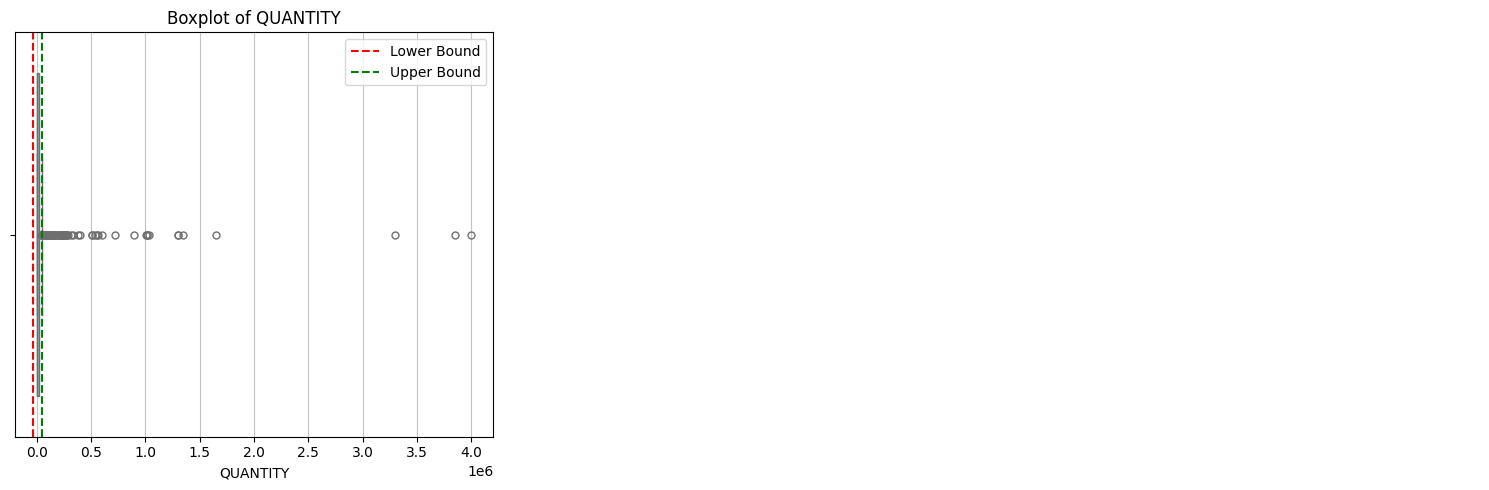

In [196]:
# Visualizing the outliers
# Calculating the number of rows and columns based on the number of numerical columns
num_columns = len(outlier_cols)
num_rows = int(np.ceil(num_columns / 3))

# Creating a figure and axes array for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plotting boxplots for each numerical column
for i, column in enumerate(outlier_cols):
    ax = axes[i]

    # Calculating IQR and bounds
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plotting the boxplot
    sns.boxplot(x=data[column], color='skyblue', flierprops=dict(marker='o', color='red', markersize=5), ax=ax)
    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    ax.legend()
    ax.grid(axis='x', alpha=0.75)


for i in range(num_columns, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [197]:
# Function to handle outliers by capping
def handle_outliers(data, method='cap'):
    for column in data.columns:
        if column == 'QUANTITY':
            lower_bound, upper_bound = -0.31, 0.03
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

    return data


# Applying the function to handle outliers
data_cleaned = handle_outliers(data.copy(), method='cap')

# Displaying the cleaned dataset
print(data_cleaned.head())

   QUANTITY  HSCODE_2801200000  HSCODE_2801200001  HSCODE_2801200002  \
0      0.03              False              False              False   
1      0.03              False              False              False   
2      0.03              False              False              False   
3      0.03              False              False              False   
4      0.03              False              False              False   

   HSCODE_2801200003  HSCODE_2801200004  HSCODE_2801200005  HSCODE_2801200006  \
0              False              False              False              False   
1              False              False              False              False   
2              False              False              False              False   
3              False              False              False              False   
4              False              False              False              False   

   HSCODE_2801200007  HSCODE_2801200008  ...  COUNTRY_UKRAINE  \
0              

# **Target Variable Assigning**